In [2]:
import numpy as np
import dlib
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import statistics

In [4]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('face_landmarks.dat')

68


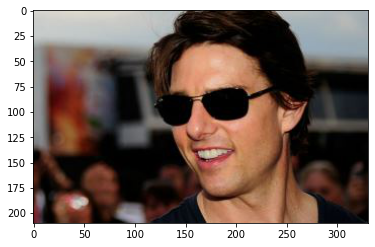

In [19]:
path = 'tom_with_glasses.jpg'
img = dlib.load_rgb_image(path)
plt.imshow(img)

rect = detector(img)[0]
sp = predictor(img, rect)
landmarks = np.array([[p.x, p.y] for p in sp.parts()])
print(len(landmarks))

In [21]:
nose_bridge_x = []
nose_bridge_y = []

for i in [28,29,30,31,33,34,35]:
        nose_bridge_x.append(landmarks[i][0])
        nose_bridge_y.append(landmarks[i][1])
        
        
### x_min and x_max
x_min = min(nose_bridge_x)
x_max = max(nose_bridge_x)

### ymin (from top eyebrow coordinate),  ymax
y_min = landmarks[20][1]
y_max = landmarks[31][1]

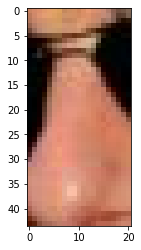

In [22]:
img2 = Image.open(path)
img2 = img2.crop((x_min,y_min,x_max,y_max))
plt.imshow(img2)

Glasses are present


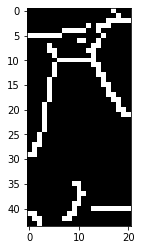

In [23]:
img_blur = cv2.GaussianBlur(np.array(img2),(3,3), sigmaX=0, sigmaY=0)

edges = cv2.Canny(image =img_blur, threshold1=100, threshold2=200)
plt.imshow(edges, cmap =plt.get_cmap('gray'))

edges_center = edges.T[(int(len(edges.T)/2))]

if 255 in edges_center:
    print("Glasses are present")
else:
        print("Glasses are absent")

In [12]:
def glasses_detector(path):
   
    img = dlib.load_rgb_image(path)
    
    if len(detector(img))==0:
        return('No face detected')
    rect = detector(img)[0]
    sp = predictor(img, rect)
    landmarks = np.array([[p.x, p.y] for p in sp.parts()])

    nose_bridge_x = []
    nose_bridge_y = []

    for i in [28,29,30,31,33,34,35]:
        nose_bridge_x.append(landmarks[i][0])
        nose_bridge_y.append(landmarks[i][1])

    # x_min and x_max
    x_min = min(nose_bridge_x)
    x_max = max(nose_bridge_x)

    # ymin (from top eyebrow coordinate),  ymax
    y_min = landmarks[20][1]
    y_max = landmarks[30][1]

    img2 = Image.open(path)
    img2 = img2.crop((x_min,y_min,x_max,y_max))

    img_blur = cv2.GaussianBlur(np.array(img2),(3,3), sigmaX=0, sigmaY=0)

    edges = cv2.Canny(image =img_blur, threshold1=100, threshold2=200)

    edges_center = edges.T[(int(len(edges.T)/2))]

    if 255 in edges_center:
        return(1)
    else:
        return(0)

In [20]:
glasses_detector(path)

1